<a href="https://colab.research.google.com/github/vjuge/oc-iml/blob/P6/modules/P6/module_P6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P6


In [ ]:
# !pip install mlflow --quiet
# !pip install pyngrok --quiet
# !databricks configure --host https://community.cloud.databricks.com/vincentjuge@gmau


In [ ]:
# import mlflow
# mlflow.set_tracking_uri("databricks")
# mlflow.set_experiment("module_P6")

In [ ]:
# from pyngrok import conf, ngrok

# conf.get_default().auth_token = "29zP9P1odMu9Cc6uXkJiPLIHv5H_3EGpswe7jL1Ey6HZwyFs7"

# Open a HTTP tunnel on the default port 80
# <NgrokTunnel: "http://<public_sub>.ngrok.io" -> "http://localhost:80">

# http_tunnel = ngrok.connect()

# Open a SSH tunnel
# <NgrokTunnel: "tcp://0.tcp.ngrok.io:12345" -> "localhost:22">

# ssh_tunnel = ngrok.connect(22, "tcp")

In [1]:
import scipy.io
# mat = scipy.io.loadmat('file.mat')
# train_ds = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/oc-iml/P6/dogs_dataset/train_data.mat')

In [ ]:
# test_ds = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/oc-iml/P6/dogs_dataset/test_data.mat')

In [ ]:
# train_ds.keys()

In [ ]:
# test_ds.keys()

In [ ]:
# train_ds['train_data'][0][1]

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# https://www.tensorflow.org/datasets/catalog/stanford_dogs
ds = tfds.load('stanford_dogs', split='train', shuffle_files=True, as_supervised=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteZJC4RJ/stanford_dogs-train.tfrecord


  0%|          | 0/12000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteZJC4RJ/stanford_dogs-test.tfrecord


  0%|          | 0/8580 [00:00<?, ? examples/s]

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.
<_OptionsDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


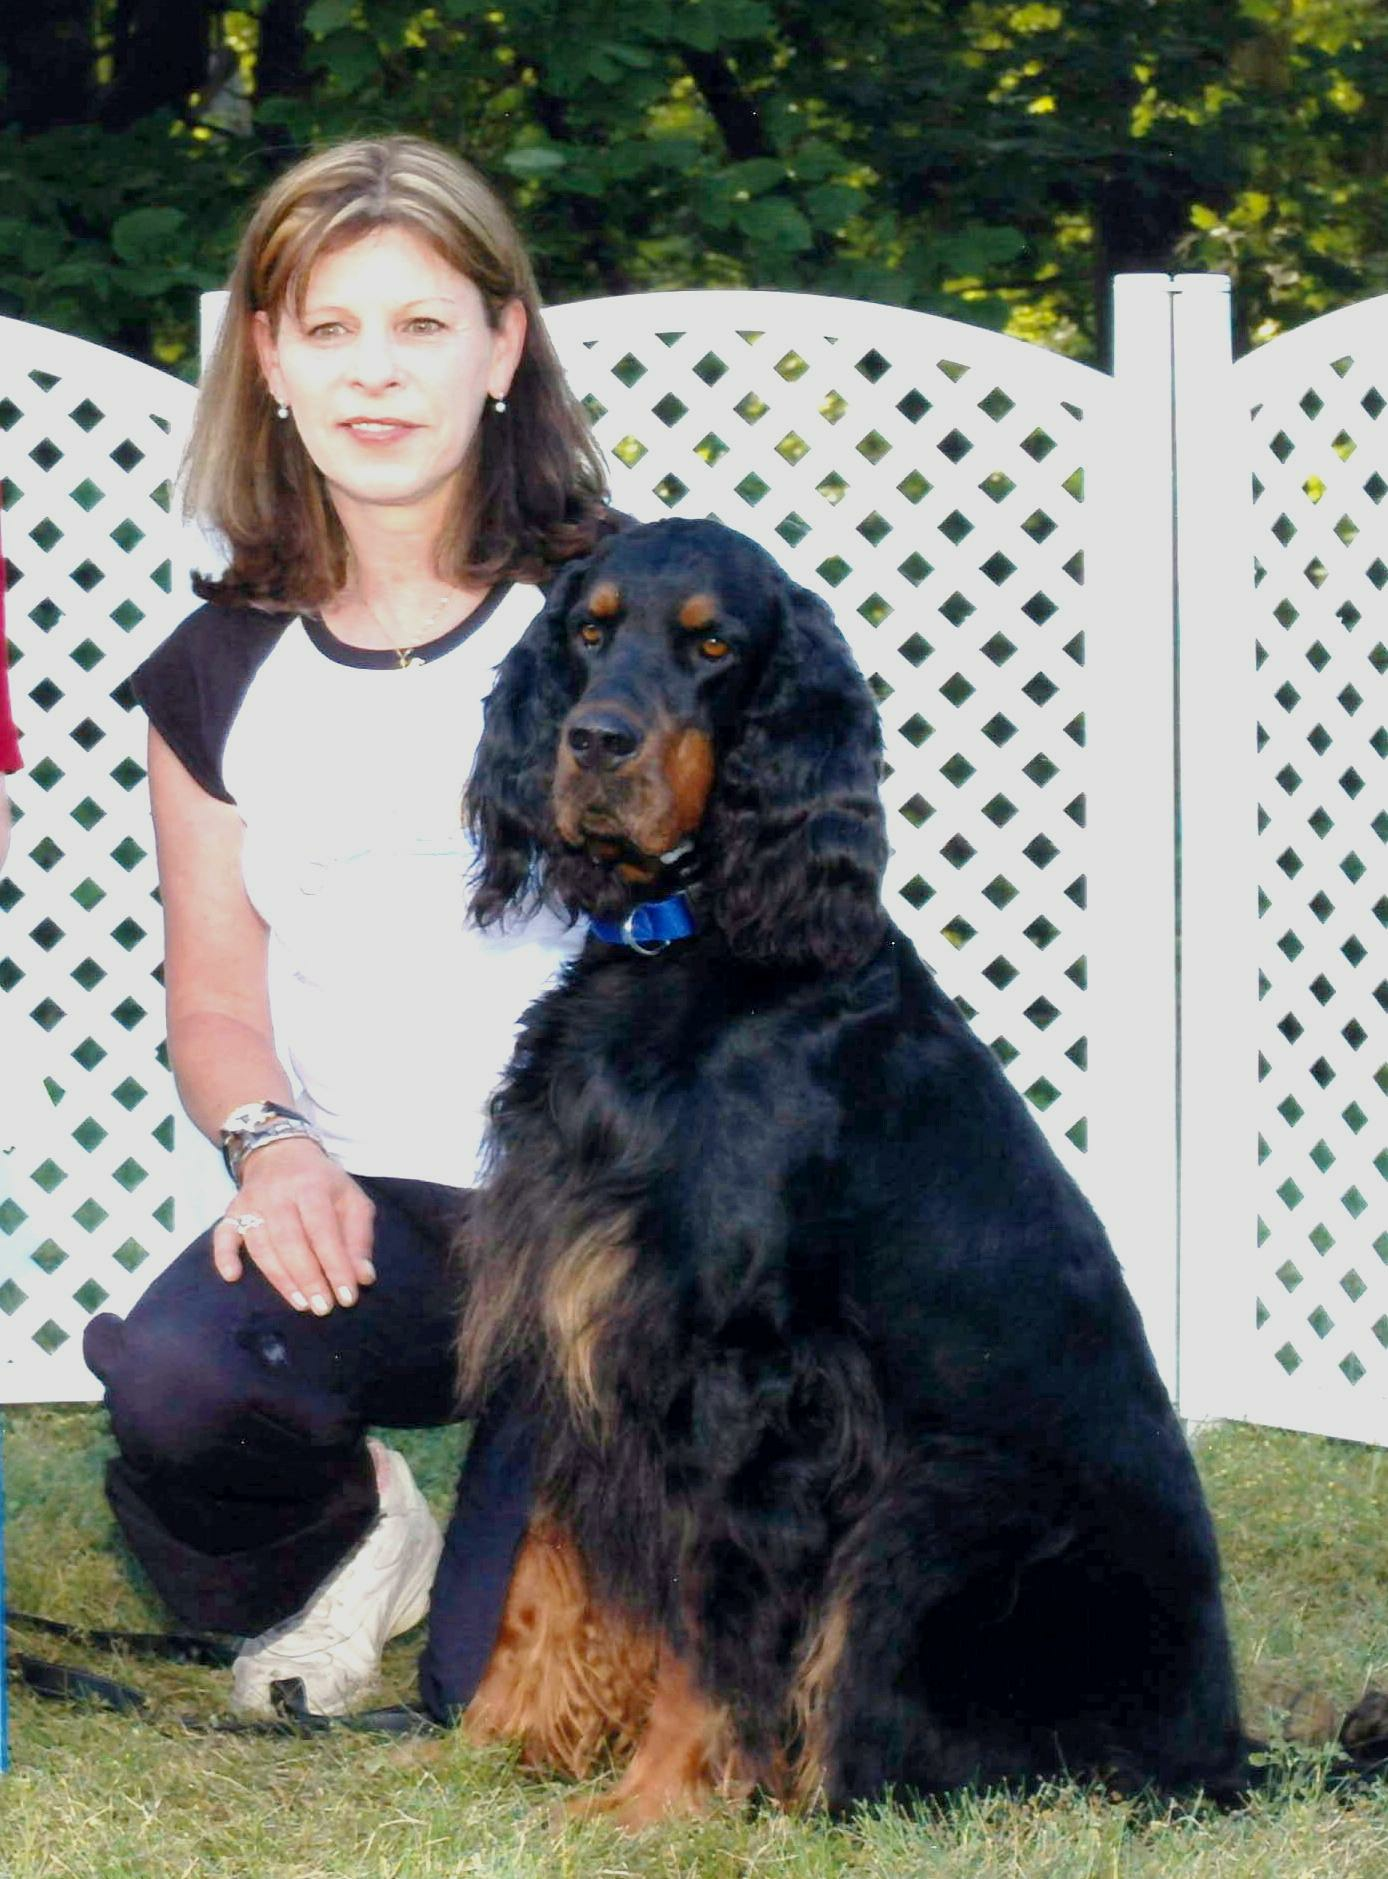

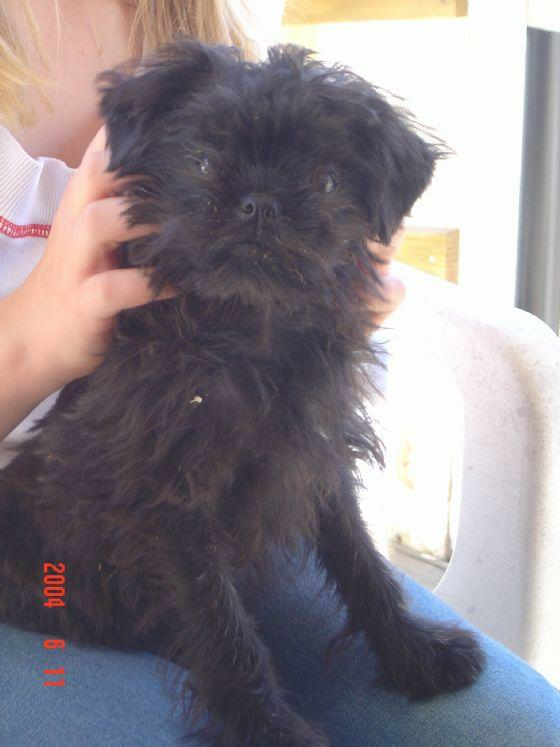

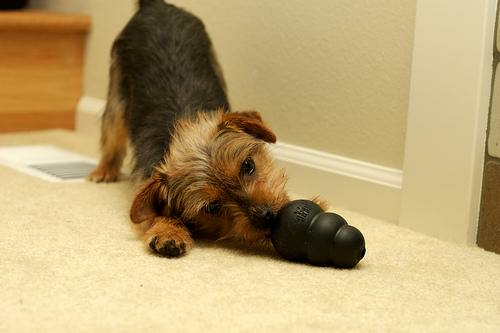

In [3]:
import matplotlib.pyplot as plt
from PIL import Image, ImageShow


for image, label in tfds.as_numpy(ds.take(3)):
  # print(type(image), type(label), label)
  # print(image)
  img = tf.keras.preprocessing.image.array_to_img(image)
  display(img)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

my_VGG16 = Sequential()  # Création d'un réseau de neurones vide 

# Ajout de la première couche de convolution, suivie d'une couche ReLU
my_VGG16.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'))

# Ajout de la deuxième couche de convolution, suivie  d'une couche ReLU
my_VGG16.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Ajout de la première couche de pooling
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [ ]:
from keras.layers import Flatten, Dense

my_VGG16.add(Flatten())  # Conversion des matrices 3D en vecteur 1D

# Ajout de la première couche fully-connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation='relu'))

# Ajout de la deuxième couche fully-connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation='relu'))

# Ajout de la dernière couche fully-connected qui permet de classifier
my_VGG16.add(Dense(1000, activation='softmax'))

2022-06-02 21:06:03.096638: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 13153337344 exceeds 10% of free system memory.
2022-06-02 21:06:04.488728: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 13153337344 exceeds 10% of free system memory.
2022-06-02 21:06:07.025025: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 13153337344 exceeds 10% of free system memory.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
import scipy.io

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_3. Consider increasing the input size. Received input shape [None, 1, 148, 32] which would produce output shape with a zero or negative value in a dimension.